In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Literal, Annotated
from langgraph.graph.message import add_messages

from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
model = ChatGroq(model="llama-3.1-8b-instant")
model

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x1452a4d90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1456fd310>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
# create a State 

class ChatState(TypedDict):
    # Metadata tells LangGraph: "use add_messages as the reducer"
    messages: Annotated[list[BaseMessage], add_messages]

In [7]:
def chat_node(state: ChatState) -> ChatState:
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}

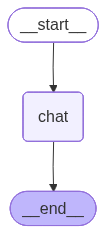

In [8]:
# lets create a graph
graph = StateGraph(ChatState)

# lets add nodes
graph.add_node("chat", chat_node)

# lets add edges
graph.add_edge(START, "chat")
graph.add_edge("chat", END)

# compile the graph
workflow = graph.compile()

workflow

In [10]:
initial_state = {"messages": [HumanMessage(content="Hello")]}

final_state = workflow.invoke(initial_state)

print(final_state)

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='617bb5d0-b8e0-4664-bfdd-f9fad465314b'), AIMessage(content='Hello. How can I assist you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 36, 'total_tokens': 45, 'completion_time': 0.014382177, 'completion_tokens_details': None, 'prompt_time': 0.001728645, 'prompt_tokens_details': None, 'queue_time': 0.005640634, 'total_time': 0.016110822}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4dea31877a', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--cb916ae6-debe-4aee-9596-f851949ffdf7-0', usage_metadata={'input_tokens': 36, 'output_tokens': 9, 'total_tokens': 45})]}


In [11]:
final_state["messages"][-1].content

'Hello. How can I assist you?'

In [12]:
# to mimic the chatbot functionality

while True:
    user_input = input("Enter your message: ")
    if user_input.lower() in ["quit", "exit"] :
        break
    initial_state = {"messages": [HumanMessage(content=user_input)]}
    final_state = workflow.invoke(initial_state)
    print(f"User: {user_input}")
    print(f"Chatbot: {final_state['messages'][-1].content}")

User: Hello
Chatbot: Hello. Is there something I can help you with or would you like to chat?
User: Can you tell me about taco
Chatbot: Tacos are a traditional Mexican dish consisting of a small, folded corn tortilla filled with various ingredients, including meats, cheeses, vegetables, and salsas. The word "taco" is believed to have originated in the 19th century in Mexico, where it referred to a small, folded corn tortilla filled with meat or other fillings.

**History of Tacos**

Tacos have a long and rich history in Mexico, dating back to the Aztecs and Mayans. These ancient civilizations used corn tortillas as a food source, often filling them with meats, beans, and other ingredients. After the Spanish conquest of Mexico, tacos became a popular street food, with vendors selling them to workers and travelers.

**Types of Tacos**

There are many different types of tacos, each with its own unique fillings and flavor profiles. Some popular types of tacos include:

1. **Carne Asada Tac